# 0.データ読み込み

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import japanize_matplotlib
from sklearn.linear_model import LinearRegression

In [4]:
sar_gifu_data = pd.read_excel('/workspaces/akita_daizu/data/VV_VH_2021_Gifu.xlsx', header=0)

# 1.岐阜の教師データで回帰直線作成

In [7]:
# エクセルの最後の方に不要な行があるから削除　nanも削除
sar_gifu_data_droped = sar_gifu_data.head(226)
sar_gifu_data_droped = sar_gifu_data_droped.dropna()


In [29]:
features = ['VV']
X = sar_gifu_data_droped[features]
y= sar_gifu_data_droped['SM (%)']

reg = LinearRegression()
reg.fit(X,y)

b=reg.coef_
a=reg.intercept_

print("b={}".format(reg.coef_))
print("a={}".format(reg.intercept_))


b=[2.78638503]
a=61.13018347038934


Text(0, 0.5, 'SM(%)')

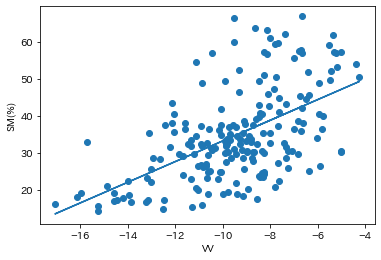

In [30]:
plt.plot(X,b*X+a)
plt.scatter(X,y)
plt.xlabel('VV')
plt.ylabel('SM(%)')

# 2.GEEから入手した秋田のSARデータに回帰式を当てて　土中水分量を予測

岐阜の観測地から作成したSARと土壌水分量の回帰式を、秋田大豆圃場のSAR観測値に適用  
秋田の圃場でセンサーが作動していたのは20210902~21210906までの間

In [84]:
# この読み込んだCSVにはすでにVV波に線形回帰適用済み
sar_akita_data = pd.read_csv('/workspaces/akita_daizu/data/VV_Ascending_pred_mac.csv')

In [79]:
# seystem indexを日付に変更するためimageidは削除
sar_akita_data_drop_columns = sar_akita_data.filter(like='‘imageID', axis=1).columns.values
droped_sar_akita_data = sar_akita_data.drop(sar_akita_data_drop_columns, axis = 1)
#位置情報は一列だけあれば良いので他の列は削除
droped_sar_akita_data['geometry'] =  sar_akita_data['.geo'] 
sar_akita_data_drop_columns = droped_sar_akita_data.filter(like='.geo', axis=1).columns.values
droped_sar_akita_data = droped_sar_akita_data.drop(sar_akita_data_drop_columns, axis = 1)

In [80]:
droped_sar_akita_data

,system:index,VV,SM(%)_pred,system:index.1,VV.1,SM(%)_pred.1,system:index.2,VV.2,SM(%)_pred.2,system:index.3,...,system:index.6,VV.6,SM(%)_pred.6,system:index.7,VV.7,SM(%)_pred.7,system:index.8,VV.8,SM(%)_pred.8,geometry
0,S1B_IW_GRDH_1SDV_20210716T083443_20210716T0835...,-13.878009,22.460707,S1B_IW_GRDH_1SDV_20210728T083444_20210728T0835...,-9.242417,35.377252,S1B_IW_GRDH_1SDV_20210809T083445_20210809T0835...,-10.269498,32.515407,S1B_IW_GRDH_1SDV_20210821T083445_20210821T0835...,...,S1B_IW_GRDH_1SDV_20210926T083447_20210926T0835...,-12.495849,26.311938,S1B_IW_GRDH_1SDV_20211008T083447_20211008T0835...,-8.405970,37.707916,S1B_IW_GRDH_1SDV_20211020T083447_20211020T0835...,-7.329794,40.706555,"{""type"":""Point"",""coordinates"":[140.06539743301..."
1,S1B_IW_GRDH_1SDV_20210716T083443_20210716T0835...,-13.127339,24.552364,S1B_IW_GRDH_1SDV_20210728T083444_20210728T0835...,-11.610608,28.778561,S1B_IW_GRDH_1SDV_20210809T083445_20210809T0835...,-12.613542,25.983999,S1B_IW_GRDH_1SDV_20210821T083445_20210821T0835...,...,S1B_IW_GRDH_1SDV_20210926T083447_20210926T0835...,-9.203217,35.486476,S1B_IW_GRDH_1SDV_20211008T083447_20211008T0835...,-6.246295,43.725601,S1B_IW_GRDH_1SDV_20211020T083447_20211020T0835...,-4.717782,47.984626,"{""type"":""Point"",""coordinates"":[140.07740416505..."
2,S1B_IW_GRDH_1SDV_20210716T083443_20210716T0835...,-10.070877,33.068843,S1B_IW_GRDH_1SDV_20210728T083444_20210728T0835...,-11.127233,30.125427,S1B_IW_GRDH_1SDV_20210809T083445_20210809T0835...,-13.352624,23.924632,S1B_IW_GRDH_1SDV_20210821T083445_20210821T0835...,...,S1B_IW_GRDH_1SDV_20210926T083447_20210926T0835...,-11.507063,29.067077,S1B_IW_GRDH_1SDV_20211008T083447_20211008T0835...,-6.726737,42.386903,S1B_IW_GRDH_1SDV_20211020T083447_20211020T0835...,-5.448416,45.948798,"{""type"":""Point"",""coordinates"":[140.07733079374..."
3,S1B_IW_GRDH_1SDV_20210716T083443_20210716T0835...,-11.219505,29.868322,S1B_IW_GRDH_1SDV_20210728T083444_20210728T0835...,-8.608572,37.143388,S1B_IW_GRDH_1SDV_20210809T083445_20210809T0835...,-10.723149,31.251362,S1B_IW_GRDH_1SDV_20210821T083445_20210821T0835...,...,S1B_IW_GRDH_1SDV_20210926T083447_20210926T0835...,-7.371346,40.590775,S1B_IW_GRDH_1SDV_20211008T083447_20211008T0835...,-6.970141,41.708688,S1B_IW_GRDH_1SDV_20211020T083447_20211020T0835...,-10.356532,32.272898,"{""type"":""Point"",""coordinates"":[140.06351827690..."
4,S1B_IW_GRDH_1SDV_20210716T083443_20210716T0835...,-9.166477,35.588850,S1B_IW_GRDH_1SDV_20210728T083444_20210728T0835...,-7.149405,41.209189,S1B_IW_GRDH_1SDV_20210809T083445_20210809T0835...,-13.522361,23.451679,S1B_IW_GRDH_1SDV_20210821T083445_20210821T0835...,...,S1B_IW_GRDH_1SDV_20210926T083447_20210926T0835...,-9.332975,35.124922,S1B_IW_GRDH_1SDV_20211008T083447_20211008T0835...,-15.687038,17.420057,S1B_IW_GRDH_1SDV_20211020T083447_20211020T0835...,-10.183211,32.755836,"{""type"":""Point"",""coordinates"":[140.08936979828..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,S1B_IW_GRDH_1SDV_20210716T083443_20210716T0835...,-13.515064,23.472011,S1B_IW_GRDH_1SDV_20210728T083444_20210728T0835...,-8.090016,38.588285,S1B_IW_GRDH_1SDV_20210809T083445_20210809T0835...,-10.079236,33.045552,S1B_IW_GRDH_1SDV_20210821T083445_20210821T0835...,...,S1B_IW_GRDH_1SDV_20210926T083447_20210926T0835...,-10.005828,33.250095,S1B_IW_GRDH_1SDV_20211008T083447_20211008T0835...,-11.303002,29.635669,S1B_IW_GRDH_1SDV_20211020T083447_20211020T0835...,-12.421844,26.518144,"{""type"":""Point"",""coordinates"":[140.04099886437..."
492,S1B_IW_GRDH_1SDV_20210716T083443_20210716T0835...,-12.964379,25.006432,S1B_IW_GRDH_1SDV_20210728T083444_20210728T0835...,-7.767461,39.487047,S1B_IW_GRDH_1SDV_20210809T083445_20210809T0835...,-8.812891,36.574075,S1B_IW_GRDH_1SDV_20210821T083445_20210821T0835...,...,S1B_IW_GRDH_1SDV_20210926T083447_20210926T0835...,-9.955231,33.391077,S1B_IW_GRDH_1SDV_20211008T083447_20211008T0835...,-7.329459,40.707490,S1B_IW_GRDH_1SDV_20211020T083447_20211020T0835...,-9.46

In [82]:
for i in droped_sar_akita_data.filter(like='system:index', axis=1).columns:
    droped_sar_akita_data[i]  = droped_sar_akita_data[i].str.split('_', expand=True)[4]
# これで日付とVV SM geometryの組みあわせのDFになる
#　センサーでの観測日時観測9月2日に一致するsystem:index.4のデータを使う
droped_sar_akita_data

In [190]:
# この値をソフトクラスタリングして分類する
target_sm_pred = droped_sar_akita_data[['system:index.4','VV.4','SM(%)_pred.4','geometry']]
target_sm_pred


,system:index.4,VV.4,SM(%)_pred.4,geometry
0,20210902T083446,-5.619059,45.473322,"{""type"":""Point"",""coordinates"":[140.06539743301..."
1,20210902T083446,-6.393826,43.314522,"{""type"":""Point"",""coordinates"":[140.07740416505..."
2,20210902T083446,-10.199317,32.710958,"{""type"":""Point"",""coordinates"":[140.07733079374..."
3,20210902T083446,-6.241303,43.739509,"{""type"":""Point"",""coordinates"":[140.06351827690..."
4,20210902T083446,-9.649290,34.243547,"{""type"":""Point"",""coordinates"":[140.08936979828..."
...,...,...,...,...
491,20210902T083446,-9.126039,35.701524,"{""type"":""Point"",""coordinates"":[140.04099886437..."
492,20210902T083446,-6.568646,42.827407,"{""type"":""Point"",""coordinates"":[140.03776155872..."
493,20210902T083446,-7.846853,39.265829,"{""type"":""Point"",""coordinates"":[140.02476981928..."
494,20210902T083446,-6.216536,43.808520,"{""type"":""Point"",""coordinates"":[140.02443094502..."


# 3.ソフトクラスタリング

In [107]:
!pip install fuzzy-c-means

     |████████████████████████████████| 140 kB 12.0 MB/s eta 0:00:01


In [108]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [138]:
# クラスタリングに必要なデータだけ残す
cluster_df = droped_sar_akita_data[['VV.4','SM(%)_pred.4']]

In [140]:
# ndarrayのみなのでvaluesつける
X = cluster_df.values
fcm = FCM(n_clusters=5)
fcm.fit(X)

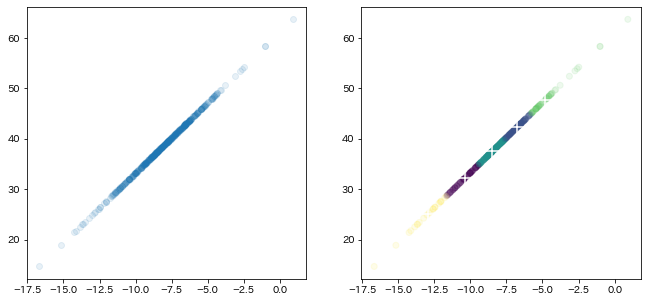

In [141]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

In [208]:
fcm_labels = fcm_labels+1

In [222]:
# 5クラスのクラスタリング結果を貼り付け
target_sm_pred['pred_labels'] = fcm_labels
target_sm_pred.columns
target_sm_pred[['system:index.4', 'VV.4', 'SM(%)_pred.4', 'pred_labels', 'geometry']]


/tmp/ipykernel_11100/2688508559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_sm_pred['pred_labels'] = fcm_labels


,system:index.4,VV.4,SM(%)_pred.4,pred_labels,geometry
0,20210902T083446,-5.619059,45.473322,4,point(140.0653974330111 40.272531661019556)
1,20210902T083446,-6.393826,43.314522,2,point(140.07740416505845 40.27351380805896)
2,20210902T083446,-10.199317,32.710958,1,point(140.0773307937425 40.27381286634717)
3,20210902T083446,-6.241303,43.739509,2,point(140.063518276908 40.28125940510503)
4,20210902T083446,-9.649290,34.243547,1,point(140.0893697982873 40.281473223748)
...,...,...,...,...,...
491,20210902T083446,-9.126039,35.701524,3,point(140.04099886437217 40.31713663754008)
492,20210902T083446,-6.568646,42.827407,2,point(140.03776155872023 40.320762485143135)
493,20210902T083446,-7.846853,39.265829,3,point(140.02476981928814 40.27340386092506)
494,20210902T083446,-6.216536,43.808520,2,point(140.02443094502166 40.27343278728915)


In [212]:
# GEEによって吐き出される座標系のフォーマットをwktに書き換える
# これはGeeの編集用スニペット作成してそこに整理する。
mod_target_sm_pred = target_sm_pred
mod_target_sm_pred['geometry']= mod_target_sm_pred['geometry'].str.replace(r'[',r'(')
mod_target_sm_pred['geometry']=mod_target_sm_pred['geometry'].str.replace(r']',r')')
mod_target_sm_pred['geometry'] = mod_target_sm_pred['geometry'].str.split(':', expand=True)[2].str[:-1]
mod_target_sm_pred['geometry']=mod_target_sm_pred['geometry'].str.replace(r',',r' ')
mod_target_sm_pred['geometry'] = 'point' + mod_target_sm_pred['geometry']

/tmp/ipykernel_11100/3138604598.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mod_target_sm_pred['geometry']= mod_target_sm_pred['geometry'].str.replace(r'[',r'(')
/tmp/ipykernel_11100/3138604598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_target_sm_pred['geometry']= mod_target_sm_pred['geometry'].str.replace(r'[',r'(')
/tmp/ipykernel_11100/3138604598.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mod_target_sm_pr

KeyError: 2

In [226]:
from shapely import wkt
mod_target_sm_pred['Coordinates'] = gpd.GeoSeries.from_wkt(mod_target_sm_pred['geometry'])
gdf_target_sm_pred = gpd.GeoDataFrame(mod_target_sm_pred, geometry='Coordinates')

/tmp/ipykernel_11100/1439194278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_target_sm_pred['Coordinates'] = gpd.GeoSeries.from_wkt(mod_target_sm_pred['geometry'])


In [201]:
gdf_target_sm_pred.set_crs(epsg=4326)

,system:index.4,VV.4,SM(%)_pred.4,geometry,pred_labels,Coordinates
0,20210902T083446,-5.619059,45.473322,point(140.0653974330111 40.272531661019556),3,POINT (140.06540 40.27253)
1,20210902T083446,-6.393826,43.314522,point(140.07740416505845 40.27351380805896),1,POINT (140.07740 40.27351)
2,20210902T083446,-10.199317,32.710958,point(140.0773307937425 40.27381286634717),0,POINT (140.07733 40.27381)
3,20210902T083446,-6.241303,43.739509,point(140.063518276908 40.28125940510503),1,POINT (140.06352 40.28126)
4,20210902T083446,-9.649290,34.243547,point(140.0893697982873 40.281473223748),0,POINT (140.08937 40.28147)
...,...,...,...,...,...,...
491,20210902T083446,-9.126039,35.701524,point(140.04099886437217 40.31713663754008),2,POINT (140.04100 40.31714)
492,20210902T083446,-6.568646,42.827407,point(140.03776155872023 40.320762485143135),1,POINT (140.03776 40.32076)
493,20210902T083446,-7.846853,39.265829,point(140.02476981928814 40.27340386092506),2,POINT (140.02477 40.27340)
494,20210902T083446,-6.216536,43.808520,point(140.02443094502166 40.27343278728915),1,POINT (140.02443 40.27343)


In [227]:
gdf_target_sm_pred.to_file('/workspaces/akita_daizu/data/sar_predict.geojson', driver="GeoJSON")  
